# Demo: pandas-rose


In [1]:
import rose
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("sample_data/WBB.csv", skiprows=lambda x: x in [0, 1, 2, 3, 4, 5, 7])
df.head()

,Station_ID,Date_Time,PM_25_concentration,pressure,air_temp,ozone_concentration,relative_humidity,wind_speed,wind_direction,wind_gust,precip_accum_five_minute,volt,volt_set_2,sensor_error_code,solar_radiation,precip_accum,precip_accum_one_minute
0,WBB,07/27/2023 00:00 MDT,NaN,25.24,78.84,37.72,26.19,0.11,7.57,1.31,NaN,13.10,13.17,NaN,0.0,NaN,0.0
1,WBB,07/27/2023 00:01 MDT,NaN,25.24,78.91,NaN,26.28,1.17,4.07,1.97,NaN,13.10,NaN,NaN,0.0,NaN,0.0
2,WBB,07/27/2023 00:02 MDT,NaN,25.24,78.89,NaN,26.42,0.26,356.50,2.20,NaN,13.09,NaN,NaN,0.0,NaN,0.0
3,WBB,07/27/2023 00:03 MDT,NaN,25.23,78.78,NaN,26.93,1.84,355.60,4.17,NaN,13.02,NaN,NaN,0.0,NaN,0.0
4,WBB,07/27/2023 00:04 MDT,NaN,25.24,78.80,NaN,26.95,0.77,10.95,2.85,NaN,13.10,NaN,NaN,0.0,NaN,0.0


In [21]:
df.rose.table(sectors=8)

var_bin,"[0.0, 5.8)","[5.8, 11.6)","[11.6, 17.4)","[17.4, 23.2)","[23.2, 29.0)","[29.0, inf)"
dir_bin,,,,,,
"(-22.5, 22.5]",142,98,66,14,0,0
"(22.5, 67.5]",128,116,18,0,0,0
"(67.5, 112.5]",68,9,0,0,0,0
"(112.5, 157.5]",31,7,5,3,2,1
"(157.5, 202.5]",45,88,115,27,0,0
"(202.5, 247.5]",43,14,13,2,0,0
"(247.5, 292.5]",42,16,4,0,0,0
"(292.5, 337.5]",72,48,5,0,0,0


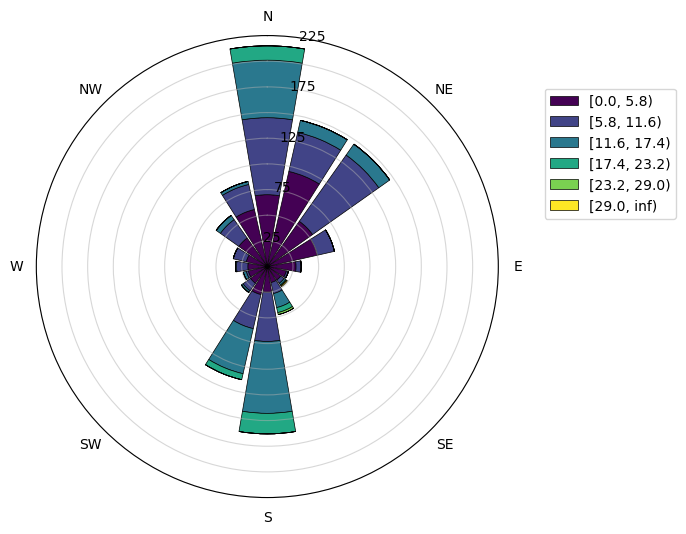

In [20]:
ax = df.rose.plot()

<Axes: xlabel='Wind Direction bins (degrees)', ylabel='Frequency'>

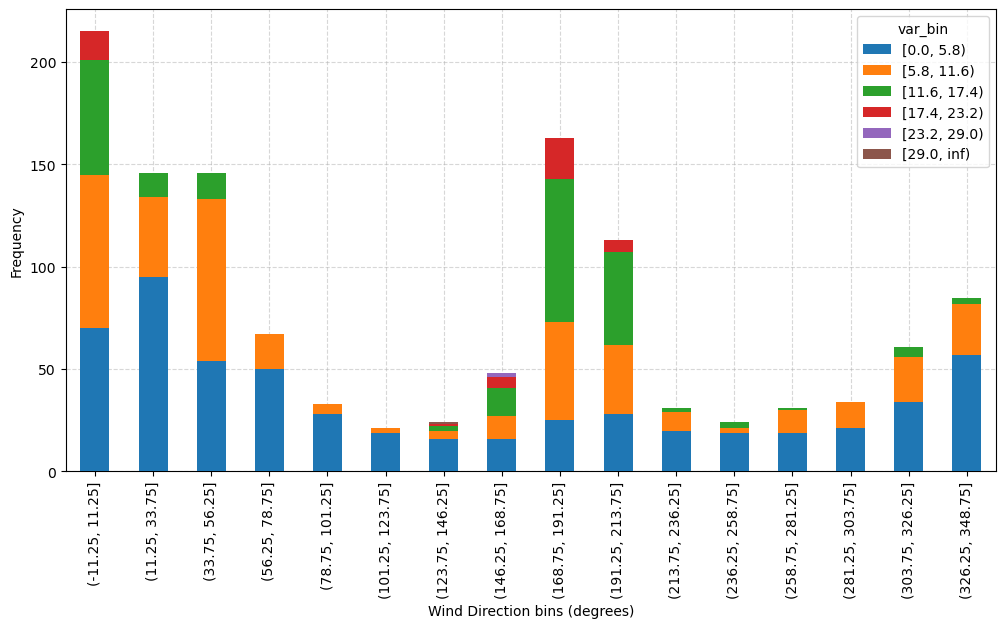

In [22]:
df.rose.bar()

# Compare with windrose package

In [5]:
import windrose

0     215.0
1     146.0
2     146.0
3      67.0
4      33.0
5      21.0
6      24.0
7      48.0
8     163.0
9     113.0
10     31.0
11     24.0
12     31.0
13     34.0
14     61.0
15     85.0
dtype: float64

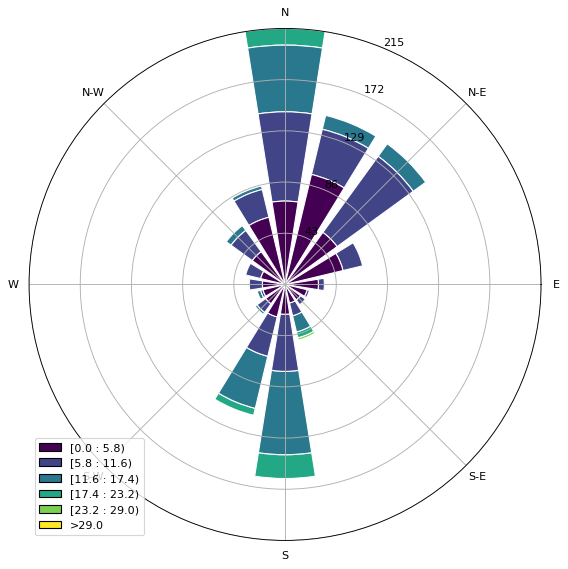

In [6]:
ax = windrose.WindroseAxes.from_ax()
ax.bar(
    df.wind_direction,
    df.wind_speed,
    normed=False,
    opening=0.8,
    edgecolor="white",
    # bins=range(0, 31, 5),
)
ax.legend()
pd.DataFrame(ax._info["table"]).sum()